# Exploratory Data Analysis for Microsoft's Movie Studio

# Project Overview

## Goal

The goal of this project is to perform exploratory data analysis (EDA) on movie datasets from various sources to provide actionable insights for Microsoft's new movie studio. The objective is to understand what types of films are currently performing well at the box office and translate those findings into recommendations for the types of films Microsoft should consider creating.

## Audience

The primary audience for this analysis is the **head of Microsoft's new movie studio**, who may not have extensive knowledge of data science or movie industry intricacies.

## Dataset

For this analysis, we will primarily use the provided data in the **im.db.zip file**, 
which is a zipped **SQLite database** containing relevant tables (movie_basics and movie_ratings). 
Additionally, we will use the **bom.movie_gross.csv.gz file**,a compressed CSV file containing box office gross information

**The movie datasets are sourced from:***
    
    . Box Office Mojo
    . IMDB
    . Rotten Tomatoes
    . TheMovieDB
    . The Numbers

Performing exploratory data analysis (EDA)
on movie datasets from various sources involving TSV files, SQLite, 
and CSV files can be achieved using the following general steps. 

# step 1: importing libraries

In [4]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# step 2: loading data

### tn.movie_budgets.csv

In [5]:
#loading tn.movie_budgets.csv data
df = pd.read_csv(r"C:\Users\PC\Downloads\learn-co-curriculum dsc-phase-1-project-v2-4 master zippedData\tn.movie_budgets.csv\tn.movie_budgets.csv")
df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [6]:
# checking the number of rows and columns
df.shape

(5782, 6)

In [7]:
# Using describe() to get descriptive statistics of the tn.movie budgets
df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


### bom.movie_gross.csv

In [8]:
#loading bom.movie_gross.csv data
df=pd.read_csv(r"C:\Users\PC\Downloads\learn-co-curriculum dsc-phase-1-project-v2-4 master zippedData\bom.movie_gross.csv\bom.movie_gross.csv")
df.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [9]:
df.shape

(3387, 5)

 To gain more insight into the data, i used a plotting library in Python, that is Matplotlib to create a bar plot of the top 5 movies based on **domestic_gross**,and **foreign_gross**.

In [10]:
# checking for the top 5 movies, that made alot of gross pay, both domestic and foreign
df=pd.read_csv(r"C:\Users\PC\Downloads\learn-co-curriculum dsc-phase-1-project-v2-4 master zippedData\bom.movie_gross.csv\bom.movie_gross.csv")
df = df.sort_values(by='domestic_gross', ascending=False).head(5)
df = df.sort_values(by='foreign_gross', ascending=False).head(5)
df

,title,studio,domestic_gross,foreign_gross,year
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015


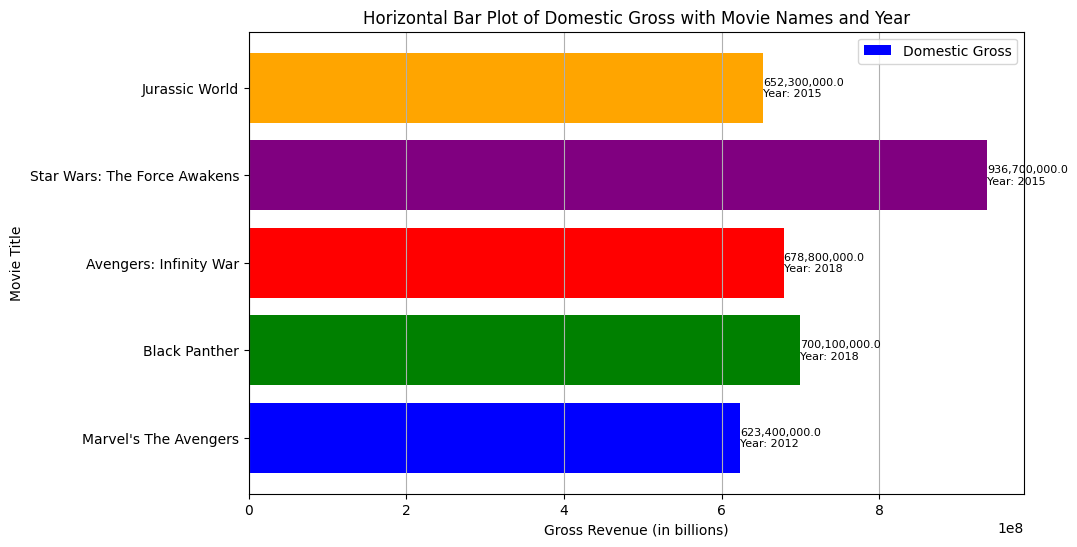

In [11]:
# plotting data
data = {'title': ["Marvel's The Avengers", 
                  "Black Panther", 
                  "Avengers: Infinity War", 
                  "Star Wars: The Force Awakens", 
                  "Jurassic World"],
        'studio': ["BV", "BV", "BV", "BV", "Uni."],
        'domestic_gross': [623400000.0, 700100000.0, 678800000.0, 936700000.0, 652300000.0],
        'foreign_gross': [895500000, 646900000, 1369500000, 1131600000, 1019400000],
        'year': [2012, 2018, 2018, 2015, 2015]}

df = pd.DataFrame(data)

# Convert 'foreign_gross' to numeric to remove commas.
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'].replace(',', '', regex=True))

# Plotting
plt.figure(figsize=(10, 6))

# Horizontal bar plot for 'domestic_gross' with different colors
bars = plt.barh(df['title'], df['domestic_gross'], 
                color=['blue', 'green', 'red', 'purple', 'orange'], 
                label='Domestic Gross'
               )

# Display values and years in front of the bars
for i, (value, year) in enumerate(zip(df['domestic_gross'], df['year'])):
    plt.text(value, i, f'{value:,}\nYear: {year}', 
             ha='left', va='center', 
             fontsize=8, 
             color='black'
            )

# Set labels and title
plt.xlabel('Gross Revenue (in billions)')
plt.ylabel('Movie Title')
plt.title('Horizontal Bar Plot of Domestic Gross with Movie Names and Year')
plt.legend()
plt.grid(axis='x')
plt.show()








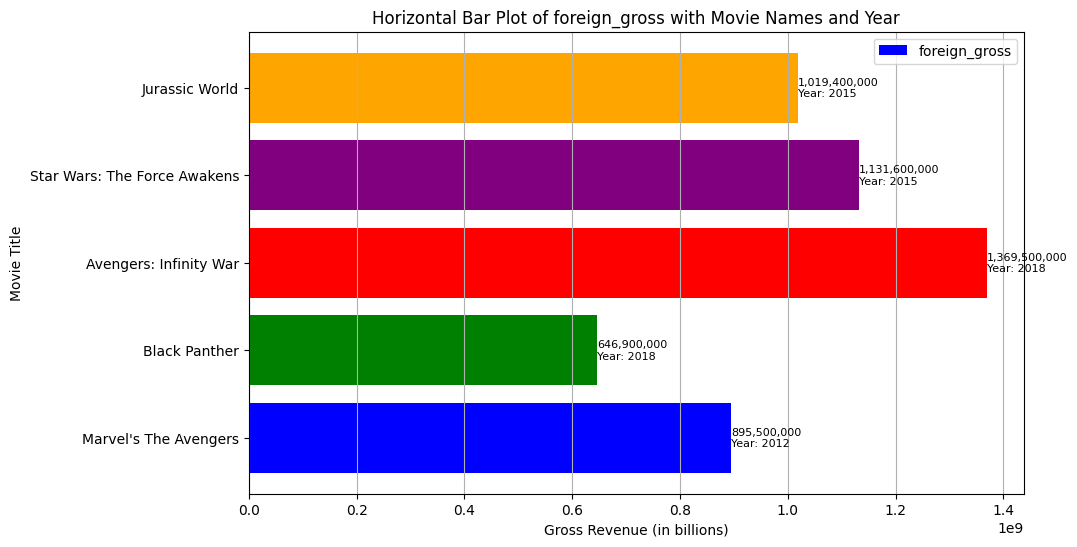

In [12]:

df = pd.DataFrame(data)

# Convert 'foreign_gross' to numeric to remove commas.
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'].replace(',', '', regex=True))

# Plotting
plt.figure(figsize=(10, 6))

# Horizontal bar plot for 'domestic_gross' with different colors
bars = plt.barh(df['title'], df['foreign_gross'], 
                color=['blue', 'green', 'red', 'purple', 'orange'], 
                label='foreign_gross'
               )

# Display values and years in front of the bars
for i, (value, year) in enumerate(zip(df['foreign_gross'], df['year'])):
    plt.text(value, i, f'{value:,}\nYear: {year}', 
             ha='left', va='center', 
             fontsize=8, 
             color='black'
            )

# Set labels and title
plt.xlabel('Gross Revenue (in billions)')
plt.ylabel('Movie Title')
plt.title('Horizontal Bar Plot of foreign_gross with Movie Names and Year')
plt.legend()
plt.grid(axis='x')
plt.show()


### rt.movie_information.tsv

In [13]:
#loading rt.movie_info into the dataframe
df=pd.read_csv(r"C:\Users\PC\Downloads\learn-co-curriculum dsc-phase-1-project-v2-4 master zippedData\rt.movie_info.tsv\rt.movie_info.tsv",delimiter='\t')
df.head(10)


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",NaN,NaN,108 minutes,NaN


In [14]:
df.shape

(1560, 12)

In [15]:
df.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


### rt.review.tsv

In [16]:
#loading rt.review.tsv data
df=pd.read_csv(r"C:\Users\PC\Downloads\learn-co-curriculum dsc-phase-1-project-v2-4 master zippedData\rt.reviews.tsv\rt.reviews.tsv", delimiter='\t', encoding='latin1')
df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [17]:
#checking for the number of rows and columns
df.shape

(54432, 8)

In [18]:
df.describe()

,id,top_critic
count,54432.000000,54432.000000
mean,1045.706882,0.240594
std,586.657046,0.427448
min,3.000000,0.000000
25%,542.000000,0.000000
50%,1083.000000,0.000000
75%,1541.000000,0.000000
max,2000.000000,1.000000


### tmdb.movies.csv

In [19]:
#loading tmdb.movies.csv data
df=pd.read_csv(r"C:\Users\PC\Downloads\learn-co-curriculum dsc-phase-1-project-v2-4 master zippedData\tmdb.movies.csv\tmdb.movies.csv")
df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [20]:
df.shape

(26517, 10)

In [21]:
df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


## im.db SQL database 

In [22]:
# reading the sql, im.db data, using sqlite
#loading the movie_basics table
conn=sqlite3.connect(r"C:\Users\PC\Downloads\learn-co-curriculum dsc-phase-1-project-v2-4 master zippedData\im.db\im.db")
df = pd.read_sql("SELECT * FROM movie_basics", conn)
cur = conn.cursor()
df.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [23]:
df.shape

(146144, 6)

In [24]:
#loading the movie_ratings table
conn=sqlite3.connect(r"C:\Users\PC\Downloads\learn-co-curriculum dsc-phase-1-project-v2-4 master zippedData\im.db\im.db")
df = pd.read_sql("SELECT * FROM movie_ratings", conn)
cur = conn.cursor()
df.head(10)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [25]:
#joining movie_basics table, with movie_ratings table
query = """
    SELECT *
    FROM movie_basics
    JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
    """
df = pd.read_sql_query(query, conn)
df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119


In [26]:


averagerating_column = df['averagerating']
numvotes_column = df['numvotes']

# To display the first 10 rows of these columns, you can use head(10)
print("averagerating_column:")
print(averagerating_column.head(10))

print("\nnumvotes_column:")
print(numvotes_column.head(10))

averagerating_column:
0    7.0
1    7.2
2    6.9
3    6.1
4    6.5
5    4.1
6    8.1
7    6.8
8    4.6
9    7.6
Name: averagerating, dtype: float64

numvotes_column:
0      77
1      43
2    4517
3      13
4     119
5      32
6     263
7     451
8      64
9      53
Name: numvotes, dtype: int64


#### finding the movies with the highest average_rating in the movie_rating table from the (im.db SQL database)

In [27]:
#previewing the top rating using (averagerating column)
# Find the index of the row with the maximum averagerating
max_rating_index = df['averagerating'].idxmax()

# i used the index to get the details of the movie with the highest rating
highest_average_rating = df.loc[max_rating_index]

# i printed the details of the highest average_rating
print(" the highest average_rating:")
print(highest_average_rating)


 the highest average_rating:
movie_id                                               tt10176328
primary_title      Exteriores: Mulheres Brasileiras na Diplomacia
original_title     Exteriores: Mulheres Brasileiras na Diplomacia
start_year                                                   2018
runtime_minutes                                              52.0
genres                                                Documentary
movie_id                                               tt10176328
averagerating                                                10.0
numvotes                                                        5
Name: 702, dtype: object


In [28]:
# imported ipython.display as display,to display the data in a table format for easy reading of the data
import IPython.display as display
# Sorted the DataFrame by 'averagerating' in descending order
top_movies = df.sort_values(by='averagerating', ascending=False)

# Taking the first 10 rows (top 10 movies with the highest_average rating)
top_10_movies = top_movies.head(10)

# Displaying the top 10 movies and their ratings in a table
display.display(top_10_movies[['original_title', 'start_year', 
                               'runtime_minutes', 'averagerating', 
                               'genres', 'numvotes']])

,original_title,start_year,runtime_minutes,averagerating,genres,numvotes
51109,Fly High: Story of the Disc Dog,2019,65.0,10.0,Documentary,7
65944,Calamity Kevin,2019,77.0,10.0,"Adventure,Comedy",6
71577,Pick It Up! - Ska in the '90s,2019,99.0,10.0,Documentary,5
73616,Renegade,2019,NaN,10.0,Documentary,20
65755,Ellis Island: The Making of a Master Race in A...,2018,70.0,10.0,"Documentary,History",6
878,The Dark Knight: The Ballad of the N Word,2018,129.0,10.0,"Comedy,Drama",5
64646,A Dedicated Life: Phoebe Brand Beyond the Group,2015,93.0,10.0,Documentary,5
9745,Freeing Bernie Baran,2010,100.0,10.0,"Crime,Documentary",5
702,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52.0,10.0,Documentary,5
49925,Dog Days in the Heartland,2017,NaN,10.0,Drama,5


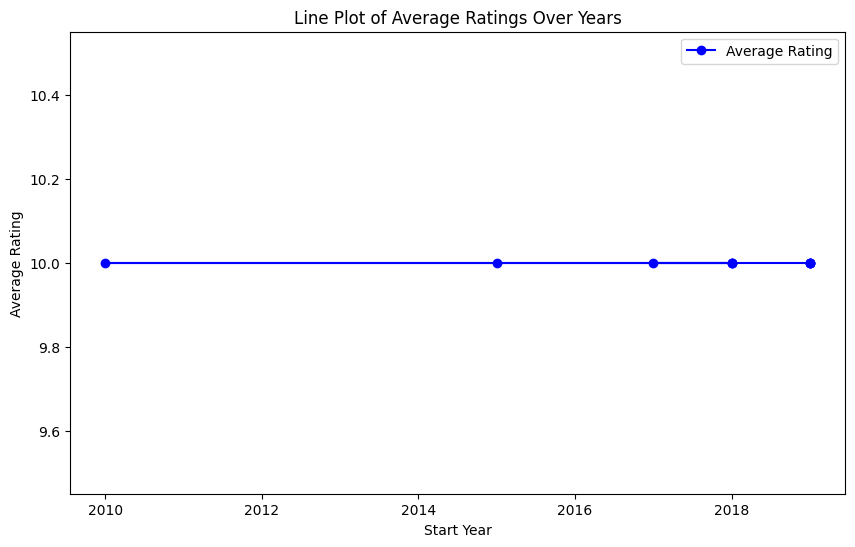

In [29]:

# Create a DataFrame
df = pd.DataFrame(top_10_movies)

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(df['start_year'], 
         df['averagerating'], 
         marker='o', 
         linestyle='-', 
         color='b', 
         label='Average Rating')

# Title and labels
plt.title('Line Plot of Average Ratings Over Years')
plt.xlabel('Start Year')
plt.ylabel('Average Rating')

# Show the legend
plt.legend()

# Show the plot
plt.show()

# tn.movie_budgets.csv

In [30]:
#reading data from tn.movie_budgets.csv
df = pd.read_csv(r"C:\Users\PC\Downloads\learn-co-curriculum dsc-phase-1-project-v2-4 master zippedData\tn.movie_budgets.csv\tn.movie_budgets.csv")
df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [31]:
# checking for null values
df.isnull()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
5777,False,False,False,False,False,False
5778,False,False,False,False,False,False
5779,False,False,False,False,False,False
5780,False,False,False,False,False,False


In [32]:
df.shape

(5782, 6)

Which movies have the highest worldwide_gross

In [33]:

#movies with the highest worlwide gross
highest_grossing_movies = df.sort_values(by=['worldwide_gross'], ascending=False).head(5)
print(f"""The top 5 movies with the highest worldwide gross are:
      \n{highest_grossing_movies[['movie', 'worldwide_gross']]}
      """)

The top 5 movies with the highest worldwide gross are:
      
                       movie worldwide_gross
3737  Fifty Dead Men Walking        $997,921
3432                    Duma        $994,790
5062               Insidious     $99,870,886
883                  Hellboy     $99,823,958
5613                 Mad Max     $99,750,000
      


top 5 movies with the highest domestic_gross

In [34]:

# movies with the highest domestic_gross
highest_grossing_movies = df.sort_values(by=['domestic_gross'], ascending=False).head(5)
print(f"""The top 5 movies with the highest domestic_gross are:
      \n{highest_grossing_movies[['movie', 'domestic_gross']]}
 """)

The top 5 movies with the highest domestic_gross are:
      
                             movie domestic_gross
311   AstÃ©rix aux Jeux Olympiques       $999,811
1605             Gnomeo and Juliet    $99,967,670
642              Christopher Robin    $99,215,042
4373                   Desert Blue        $99,147
707                       Hercules    $99,112,101
 
